In [1]:
##MNIST Digit recognization with SVM
import pandas as pd #data processing and datafrme reading
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
train_data=pd.read_csv("train.csv") # read the csv file
train_data.head() #print first five columns of train_data



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data=pd.read_csv("test.csv") #read the csv file
test_data.head()                  #print first five columns of train_data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data.shape     #print the number of columns and rows of train_data

(42000, 785)

In [10]:
test_data.shape      #print the numbers of rows and columns of test_data

(28000, 784)

In [11]:
#  there are no mising values in datasets
train_data.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [12]:
#  there are no missing values in datasets
test_data.isnull().sum().head(10)

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [13]:
print("Dimensions:",train_data.shape,"\n")
print(test_data.info())
test_data.head()

Dimensions: (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print("Dimensions",test_data.shape,"\n")
print(test_data.info())
test_data.head()

Dimensions (28000, 784) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [19]:
order=list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


F:\New folder\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

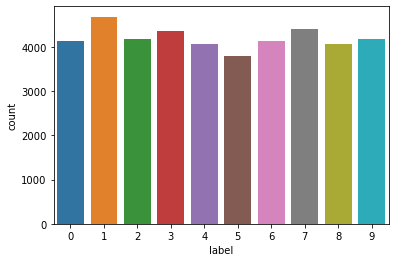

In [21]:
# visualizing the number of class and counts in datasets
sns.countplot(train_data['label'])

F:\New folder\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

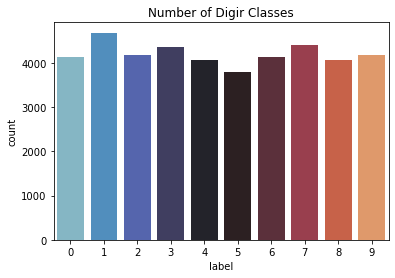

In [22]:
plt.plot(figure=(16,10))
g=sns.countplot(train_data['label'],palette='icefire')
plt.title("Number of Digir Classes")
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit Four')

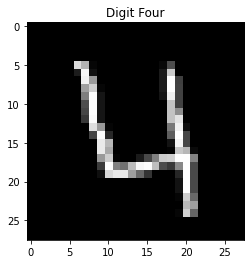

In [33]:
four=train_data.iloc[3,1:]
four.shape
four=four.values.reshape(28,28)
plt.imshow(four,cmap='gray')
plt.title("Digit Four")

In [34]:
print(train_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

Text(0.5, 1.0, 'Digit Nine')

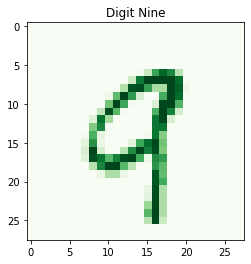

In [74]:
nine=train_data.iloc[41999,1:]
nine.shape
nine=nine.values.reshape(28,28)
plt.imshow(nine,cmap='Greens')
plt.title("Digit Nine")



In [40]:
round(train_data.drop("label",axis=1).mean(),2)


pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [82]:
## seperating x and y variable
y=train_data['label']
## dropping variable label from x variable
X = train_data.drop(columns = 'label')
print(train_data.shape)        ## printing the size of variable
X.shape

(42000, 785)


(42000, 784)

In [61]:
## normalization
X = X/255.0
test_data=test_data/255.0
print("X:",X.shape)
print("test_data:",test_data.shape)

X: (42000, 784)
test_data: (28000, 784)


In [87]:
##scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_scaled=scale(X)
##train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,train_size=0.2,random_state=10)

In [88]:
##linear
from sklearn.svm import SVC
model_linear=SVC(kernel = 'linear')
model_linear.fit(X_train,y_train)
##prediction
y_pred=model_linear.predict(X_test)

In [92]:
##confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
##confusion matix
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

accuracy: 0.9133333333333333
[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


In [95]:
non_linear_model=SVC(kernel='rbf')
non_linear_model.fit(X_train,y_train)
y_pred=non_linear_model.predict(X_test)

In [96]:
print("accuracy",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

accuracy 0.9348412698412698
[[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]


In [103]:
##non_linear_model gives 93% accuracy thus go forward ab choose hyperparameter cooresponding to nonlinear model
## let's now tune the model to get the optimal value of C and gamma corresponding to RBF kernel. Let's use 5 fold cross validation
##creating a Kfold object with 5 splits
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
folds=KFold(n_splits=5,shuffle=True,random_state=10)
##specify range of parameters
##Set the parameters by cross validation
hyper_params=[{"gamma":[1e-2,1e-3,1e-4],"C":[5,10]}]


##SPECIFY MODELS
model=SVC(kernel='rbf')

##set up gridsearchcv
model_cv=GridSearchCV(estimator=model,
                     param_grid=hyper_params,
                     scoring='accuracy',
                     cv=folds,
                     verbose=1,
                     return_train_score=True)
##fit the model
model_cv.fit(X_train,y_train)
               
               

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [104]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,137.676652,3.079784,22.757919,0.201809,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,27.333842,0.148443,11.910102,0.131459,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
2,25.110582,0.206854,12.368965,0.133443,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379
3,1884.280648,3484.798670,24.395055,3.494106,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,30.696403,1.321186,13.181205,0.275447,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
5,22.023730,0.686613,11.764610,0.582661,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744
